In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import
df0 = pd.read_csv('s2_aam_raw_data.csv', index_col = 0)
df1 = df0

# Drop index column from import
# df0 = df0.drop(columns = 'Unnamed: 0')
# df1 = df1.drop(columns = 'Unnamed: 0')

In [3]:
df0['test'] = np.nan
df0_cols = set(list(df0.columns))
print(df0_cols)


{'department', 'test', 'location', 'job_level', 'age', 'year', 'experience', 'applicantid', 'education', 'managerid', 'job_source', 'gender', 'employeeid', 'manager_race', 'leave_date', 'job_title', 'entry_date', 'job_change_reason', 'entry_wage', 'race', 'manager_gender', 'salary', 'perf_review'}


In [4]:
print("s2_aam_master.shape: ", df0.shape)
df0d = df0.drop_duplicates(subset=['applicantid', 'employeeid', 'year'], keep='first')
print("s2_aam_master.drop_duplicates(subset=['applicantid', 'employeeid', 'year'], keep='first').shape: ", df0d.shape)

s2_aam_master.shape:  (8746, 23)
s2_aam_master.drop_duplicates(subset=['applicantid', 'employeeid', 'year'], keep='first').shape:  (8746, 23)


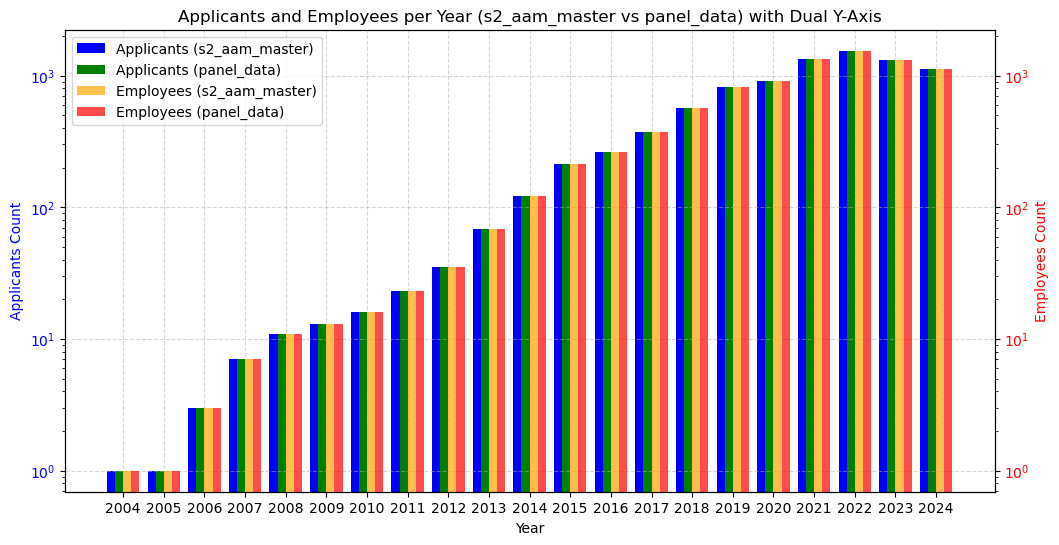

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define labels for each dataframe
label_df0 = 's2_aam_master'
label_df1 = 'panel_data'

df0 = df0.drop_duplicates(subset=['applicantid', 'employeeid', 'year'], keep='first')
df1 = df1.drop_duplicates(subset=['applicantid', 'employeeid', 'year'], keep='first')

# Filter for applicants and employees in each dataframe
df0_applicants = df0[df0['applicantid'].notna()]
#df0_applicants['year'] = pd.to_datetime(df0_applicants['applied_at']).dt.year
df0_employees = df0[df0['employeeid'].notna()]

df1_applicants = df1[df1['applicantid'].notna()]
#df1_applicants['year'] = pd.to_datetime(df1_applicants['applied_at']).dt.year
df1_employees = df1[df1['employeeid'].notna()]

# Count by year for applicants and employees in each dataframe
applicants_per_year_df0 = df0_applicants['year'].value_counts().sort_index()
employees_per_year_df0 = df0_employees['year'].value_counts().sort_index()

applicants_per_year_df1 = df1_applicants['year'].value_counts().sort_index()
employees_per_year_df1 = df1_employees['year'].value_counts().sort_index()

# Creating a combined DataFrame for plotting
years = sorted(set(applicants_per_year_df0.index).union(employees_per_year_df0.index).union(
               applicants_per_year_df1.index).union(employees_per_year_df1.index))

plot_data = pd.DataFrame({
    'Year': years,
    f'Applicants_{label_df0}': applicants_per_year_df0.reindex(years, fill_value=0).values,
    f'Employees_{label_df0}': employees_per_year_df0.reindex(years, fill_value=0).values,
    f'Applicants_{label_df1}': applicants_per_year_df1.reindex(years, fill_value=0).values,
    f'Employees_{label_df1}': employees_per_year_df1.reindex(years, fill_value=0).values
})

# Set up positions for bars with a smaller width to fit all four
x = np.arange(len(years))
width = 0.2  # Narrower width for each bar to avoid overlap

fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis (Applicants)
ax1.bar(x - 1.5 * width, plot_data[f'Applicants_{label_df0}'], width, label=f'Applicants ({label_df0})', color='blue')
ax1.bar(x - 0.5 * width, plot_data[f'Applicants_{label_df1}'], width, label=f'Applicants ({label_df1})', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Applicants Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(plot_data['Year'])
ax1.grid(True, linestyle='--', alpha=0.5)


# Secondary y-axis (Employees)
ax2 = ax1.twinx()
ax2.bar(x + 0.5 * width, plot_data[f'Employees_{label_df0}'], width, label=f'Employees ({label_df0})', color='orange', alpha=0.7)
ax2.bar(x + 1.5 * width, plot_data[f'Employees_{label_df1}'], width, label=f'Employees ({label_df1})', color='red', alpha=0.7)
ax2.set_ylabel('Employees Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_yscale('log')
ax2.set_yscale('log')


# Legend combining both axes
fig.legend(loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax1.transAxes)
plt.title('Applicants and Employees per Year (s2_aam_master vs panel_data) with Dual Y-Axis')
plt.show()

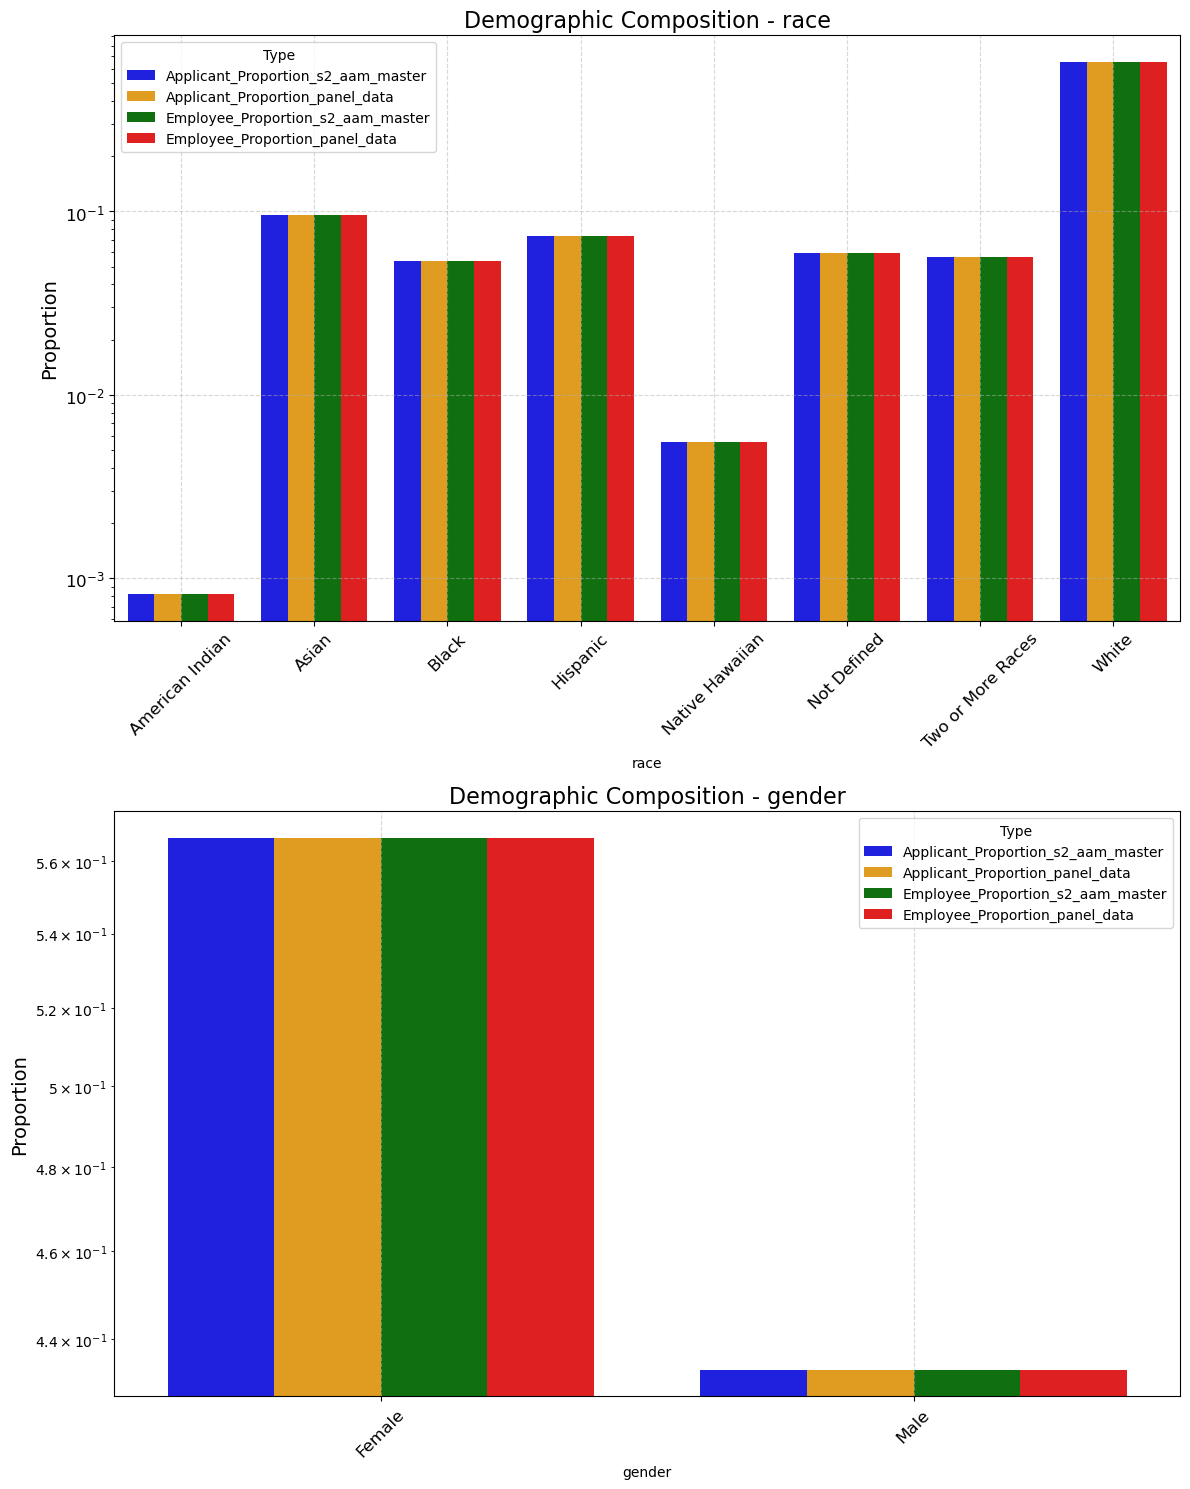

In [6]:
# Create a taller figure for the subplots
fig = plt.figure(figsize=(12, 15))  # Adjusted width and increased height

demographics = ['race', 'gender']

# Loop through the demographic features and create subplots
for i, demographic in enumerate(demographics):
    # Count values for applicants and hires
    applicant_counts_df0 = df0_applicants[demographic].value_counts(normalize=True).reset_index()
    employee_counts_df0 = df0_employees[demographic].value_counts(normalize=True).reset_index()
    
    applicant_counts_df1 = df1_applicants[demographic].value_counts(normalize=True).reset_index()
    employee_counts_df1 = df1_employees[demographic].value_counts(normalize=True).reset_index()
    
    # Rename the columns for merging
    applicant_counts_df0.columns = [demographic, 'Applicant_Proportion_s2_aam_master']
    employee_counts_df0.columns = [demographic, 'Employee_Proportion_s2_aam_master']
    
    applicant_counts_df1.columns = [demographic, 'Applicant_Proportion_panel_data']
    employee_counts_df1.columns = [demographic, 'Employee_Proportion_panel_data']
    
    # Merge the counts into a single DataFrame
    combined_counts_df0 = pd.merge(applicant_counts_df0, employee_counts_df0, on=demographic, how='outer').fillna(0)
    combined_counts_df1 = pd.merge(applicant_counts_df1, employee_counts_df1, on=demographic, how='outer').fillna(0)
    
    combined_counts = pd.merge(combined_counts_df0, combined_counts_df1, on=demographic, how='outer').fillna(0)
    
    # Create a subplot for the current demographic
    ax = fig.add_subplot(len(demographics), 1, i + 1)  # Adjust for vertical stacking
    
    # Melt the combined DataFrame for seaborn
    combined_melted = combined_counts.melt(id_vars=demographic, value_vars=[
        'Applicant_Proportion_s2_aam_master', 'Applicant_Proportion_panel_data',
        'Employee_Proportion_s2_aam_master', 'Employee_Proportion_panel_data'
    ], var_name='Type', value_name='Proportion')
    
    # Plotting both proportions in a single bar plot
    sns.barplot(x=demographic, y='Proportion', hue='Type', data=combined_melted, ax=ax, 
                palette=['blue', 'orange', 'green', 'red'])
    ax.set_title(f'Demographic Composition - {demographic}', fontsize=16)  # Larger title font size
    ax.set_ylabel('Proportion', fontsize=14)  # Larger y-label font size
    #ax.set_ylim(0, 1)  # Normalize to 1 for proportion
    ax.set_yscale('log')
    ax.tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x labels for readability and increase size
    ax.tick_params(axis='y', labelsize=12)  # Increase y-tick size
    
    # Add a light grid
    ax.grid(True, linestyle='--', alpha=0.5)
    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


   education  proportion
0  No degree         1.0
   education  proportion
0  No degree         1.0
   education  proportion
0  No degree         1.0
   education  proportion
0  No degree         1.0
     age  proportion
0   24.0    0.099547
1   25.0    0.089441
2   26.0    0.079800
3   27.0    0.074341
4   28.0    0.073295
5   22.0    0.072366
6   23.0    0.072366
7   30.0    0.065397
8   29.0    0.065164
9   31.0    0.045301
10  32.0    0.042165
11  33.0    0.032756
12  21.0    0.027762
13  34.0    0.022651
14  37.0    0.021721
15  35.0    0.020908
16  20.0    0.012080
17  38.0    0.011848
18  40.0    0.010570
19  36.0    0.010338
20  39.0    0.006040
21  43.0    0.004879
22  47.0    0.004530
23  46.0    0.004530
24  42.0    0.004182
25  45.0    0.003369
26  41.0    0.003252
27  19.0    0.003252
28  44.0    0.003020
29  50.0    0.002091
30  48.0    0.001626
31  18.0    0.001510
32  49.0    0.001045
33  52.0    0.001045
34  51.0    0.000929
35  17.0    0.000929
36  16.0    0.000697
37

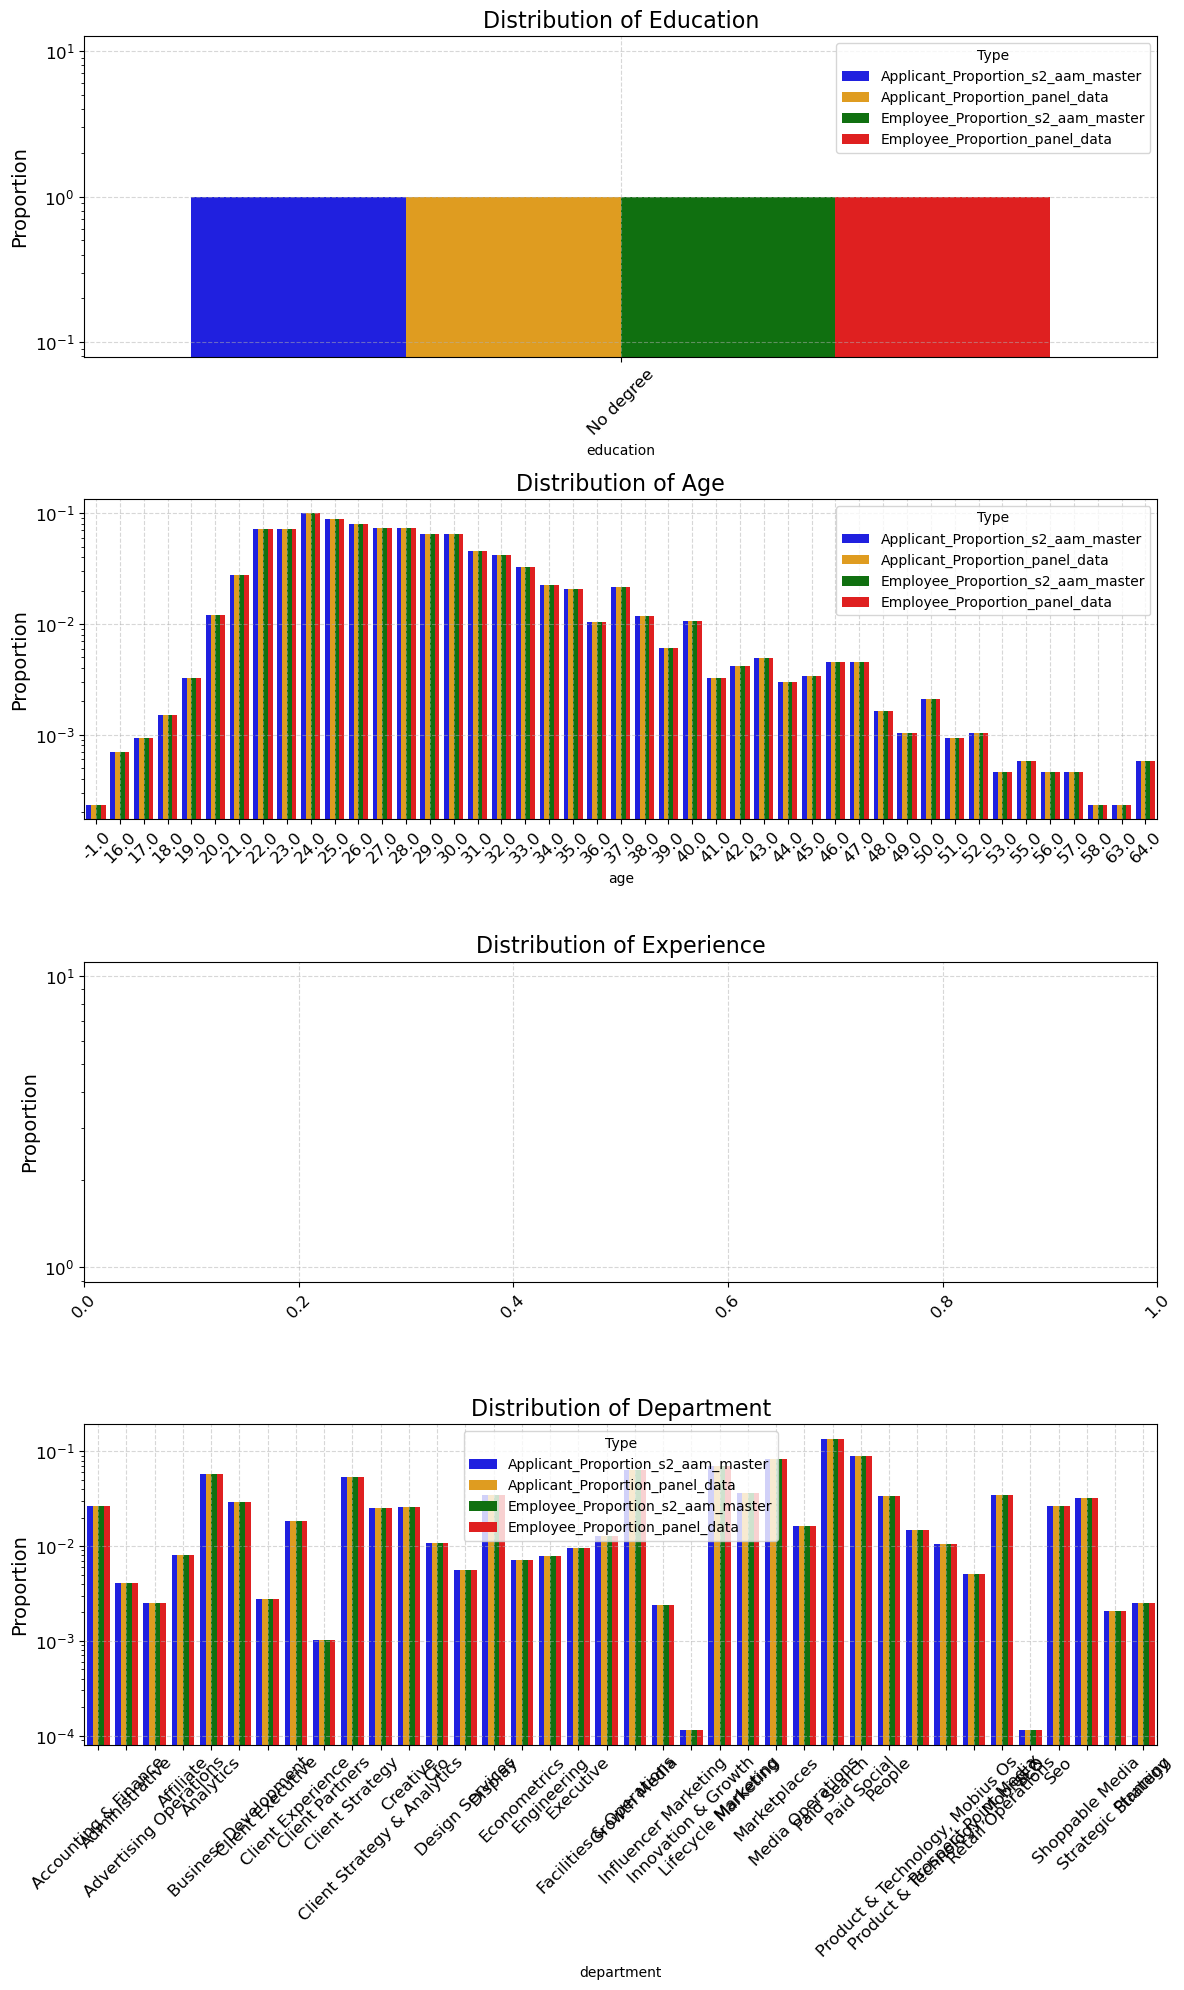

In [7]:
# Create a taller figure for the subplots
fig = plt.figure(figsize=(12, 20))  # Adjusted width and increased height

# Replace NaN values in 'education' with 'no degree'
df0_applicants['education'] = df0_applicants['education'].fillna('No degree')
df0_employees['education'] = df0_employees['education'].fillna('No degree')
df1_applicants['education'] = df1_applicants['education'].fillna('No degree')
df1_employees['education'] = df1_employees['education'].fillna('No degree')

features = ['education', 'age', 'experience', 'department']

# Loop through the features and create subplots
for i, feature in enumerate(features):
    # Count values for applicants and employees for both datasets
    applicant_counts_df0 = df0_applicants[feature].value_counts(normalize=True).reset_index()
    employee_counts_df0 = df0_employees[feature].value_counts(normalize=True).reset_index()

    applicant_counts_df1 = df1_applicants[feature].value_counts(normalize=True).reset_index()
    employee_counts_df1 = df1_employees[feature].value_counts(normalize=True).reset_index()

    print(applicant_counts_df0)
    print(employee_counts_df0)
    print(applicant_counts_df1)
    print(employee_counts_df1)

    
    # Rename the columns for merging
    applicant_counts_df0.columns = [feature, 'Applicant_Proportion_s2_aam_master']
    employee_counts_df0.columns = [feature, 'Employee_Proportion_s2_aam_master']
    
    applicant_counts_df1.columns = [feature, 'Applicant_Proportion_panel_data']
    employee_counts_df1.columns = [feature, 'Employee_Proportion_panel_data']
    
    # Merge the counts into a single DataFrame
    combined_counts_df0 = pd.merge(applicant_counts_df0, employee_counts_df0, on=feature, how='outer').fillna(0)
    combined_counts_df1 = pd.merge(applicant_counts_df1, employee_counts_df1, on=feature, how='outer').fillna(0)
    
    combined_counts = pd.merge(combined_counts_df0, combined_counts_df1, on=feature, how='outer').fillna(0)
    
    # Create a subplot for the current feature
    ax = fig.add_subplot(len(features), 1, i + 1)  # Adjust for vertical stacking
    
    # Melt the combined DataFrame for seaborn
    combined_melted = combined_counts.melt(id_vars=feature, value_vars=[
        'Applicant_Proportion_s2_aam_master', 'Applicant_Proportion_panel_data',
        'Employee_Proportion_s2_aam_master', 'Employee_Proportion_panel_data'
    ], var_name='Type', value_name='Proportion')
    
    # Plotting both proportions in a single bar plot
    sns.barplot(x=feature, y='Proportion', hue='Type', data=combined_melted, ax=ax, 
                palette=['blue', 'orange', 'green', 'red'])
    ax.set_title(f'Distribution of {feature.capitalize()}', fontsize=16)  # Larger title font size
    ax.set_ylabel('Proportion', fontsize=14)  # Larger y-label font size
    
    # Set y-axis limit for 'age' feature
    if feature == 'age':
        #max_value = combined_melted['Proportion'].max()
        #ax.set_ylim(0, max_value * 1.2)
        ax.set_yscale('log')
    elif feature == 'experience':
        ax.set_yscale('log')
    else:
        #ax.set_ylim(0, 1)  # Normalize to 1 for proportion
        ax.set_yscale('log')
    
    ax.tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x labels for readability and increase size
    ax.tick_params(axis='y', labelsize=12)  # Increase y-tick size
    
    # Add a light grid
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


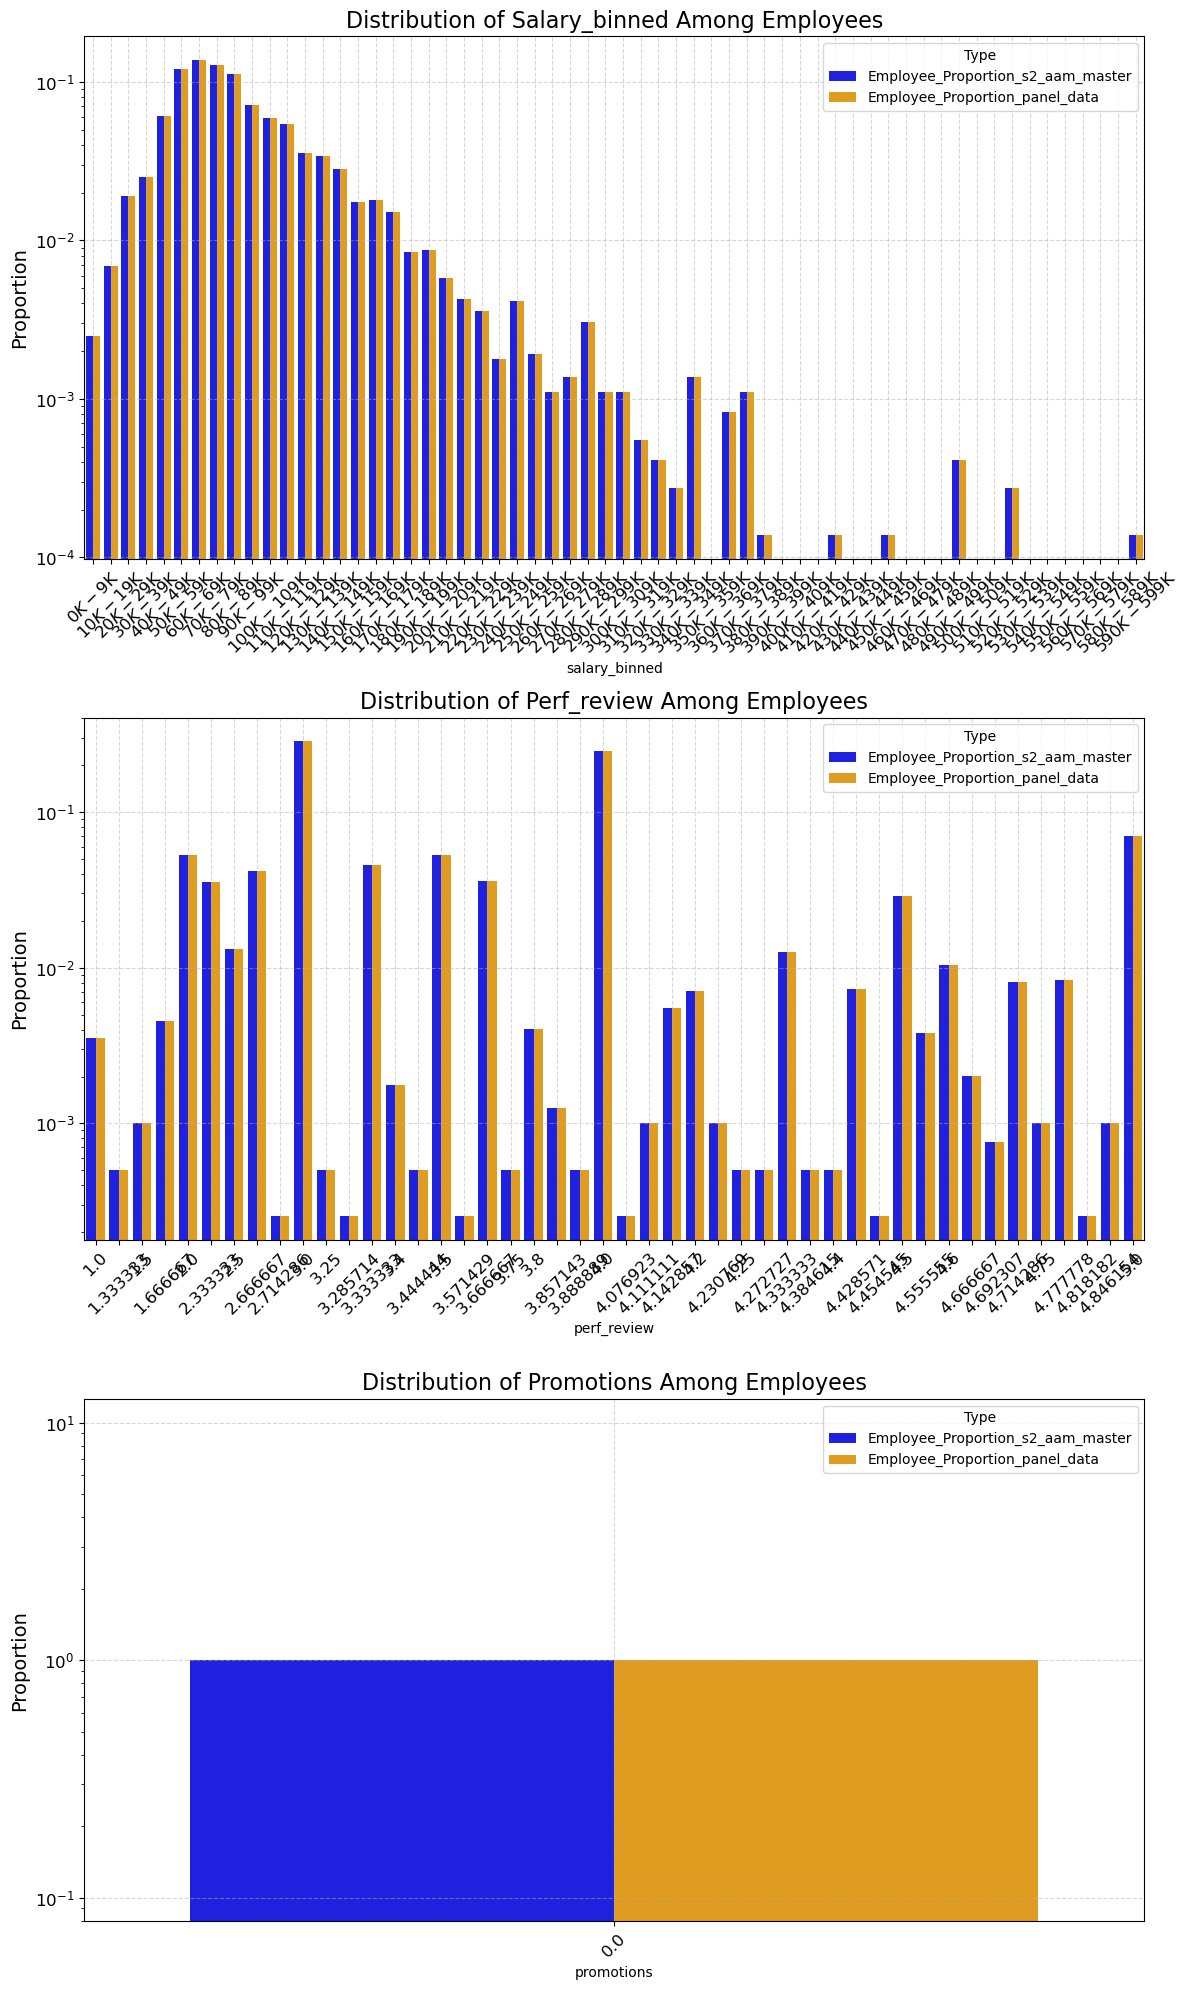

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to include only employees (where employeeid is not NaN)
df0_employees = df0[df0['employeeid'].notna()]
df1_employees = df1[df1['employeeid'].notna()]

# Calculate promotions count for df0 and df1
df0_promotions = df0_employees[df0_employees['job_change_reason'] == 'Promotion'].groupby('employeeid').size().reset_index(name='promotions')
df1_promotions = df1_employees[df1_employees['job_change_reason'] == 'Promotion'].groupby('employeeid').size().reset_index(name='promotions')

# Merge promotion counts with the main data for employees
df0_employees = df0_employees.merge(df0_promotions, on='employeeid', how='left').fillna({'promotions': 0})
df1_employees = df1_employees.merge(df1_promotions, on='employeeid', how='left').fillna({'promotions': 0})

# Determine salary range for binning
min_salary = min(df0_employees['salary'].min(), df1_employees['salary'].min())
max_salary = max(df0_employees['salary'].max(), df1_employees['salary'].max())

# Define salary bins and concise labels (e.g., "$40K - $49K")
salary_bins = np.arange(min_salary, max_salary + 10000, 10000)
salary_labels = [f"${int(salary_bins[i] / 1000)}K - ${int((salary_bins[i + 1] - 1) / 1000)}K" for i in range(len(salary_bins) - 1)]

# Apply binning to the salary column
df0_employees['salary_binned'] = pd.cut(df0_employees['salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)
df1_employees['salary_binned'] = pd.cut(df1_employees['salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)

# Initialize figure with a taller layout for stacked plots
fig = plt.figure(figsize=(12, 20))

# Define features for comparison, including the new 'promotions' column
comparison_features = ['salary_binned', 'perf_review', 'promotions']

# Loop through each feature and create a subplot
for i, feature in enumerate(comparison_features):
    # Count values for employees in each dataset
    employee_counts_df0 = df0_employees[feature].value_counts(normalize=True).reset_index()
    employee_counts_df1 = df1_employees[feature].value_counts(normalize=True).reset_index()
    
    # Rename columns for merging
    employee_counts_df0.columns = [feature, 'Employee_Proportion_s2_aam_master']
    employee_counts_df1.columns = [feature, 'Employee_Proportion_panel_data']
    
    # Merge the counts into a single DataFrame
    combined_counts = pd.merge(employee_counts_df0, employee_counts_df1, on=feature, how='outer')
    
    # Create a subplot for the current feature
    ax = fig.add_subplot(len(comparison_features), 1, i + 1)
    
    # Melt the combined DataFrame for seaborn
    combined_melted = combined_counts.melt(id_vars=feature, value_vars=[
        'Employee_Proportion_s2_aam_master', 'Employee_Proportion_panel_data'
    ], var_name='Type', value_name='Proportion')
    
    # Plotting both proportions in a single bar plot
    sns.barplot(x=feature, y='Proportion', hue='Type', data=combined_melted, ax=ax, 
                palette=['blue', 'orange'])
    ax.set_title(f'Distribution of {feature.capitalize()} Among Employees', fontsize=16)  # Larger title font size
    ax.set_ylabel('Proportion', fontsize=14)  # Larger y-label font size
    
    # Adjust y-axis limits if needed
    if feature == 'salary_binned':
        #max_value = combined_melted['Proportion'].max()
        #ax.set_ylim(0, max_value * 1.2)
        ax.set_yscale('log')
    elif feature == 'perf_review':
        #max_value = combined_melted['Proportion'].max()
        #ax.set_ylim(0, max_value * 1.2)
        ax.set_yscale('log')
    elif feature == 'promotions':
        #max_value = combined_melted['Proportion'].max()
        #ax.set_ylim(0, max_value * 1.2)
        ax.set_yscale('log')
    
    ax.tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x labels for readability
    ax.tick_params(axis='y', labelsize=12)  # Increase y-tick size
    
    # Add a light grid
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [9]:
combined_counts

,promotions,Employee_Proportion_s2_aam_master,Employee_Proportion_panel_data
0,0.0,1.0,1.0
